In [1]:
from itertools import combinations, chain
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.svm import SVC
from scipy.stats import linregress
from sklearn.datasets import load_digits
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
from statistics import mean

In [3]:
chemicals = pd.read_csv("chemicals_processed.csv")
droughts = pd.read_csv("droughts_processed.csv")
earnings = pd.read_csv("earnings_processed.csv")
education_attainment = pd.read_csv("education_attainment_processed.csv")
industry_occupation = pd.read_csv("industry_occupation_processed.csv")
water_usage = pd.read_csv("water_usage_processed.csv")

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


FileNotFoundError: File b'education_attainment_processed.csv' does not exist

In [ ]:
chemicals=chemicals[["fips", "year", "contaminant_level", "chemical_species", "value"]]

In [ ]:
earnings = earnings[["fips", "year", "total_med", "total_agri_fish_mine", "manufacturing"]]

In [ ]:
industry_occupation = industry_occupation[["fips", "year", "total_employed", "manufacturing", "finance_insurance_realestate"]]

In [ ]:
education_attainment = education_attainment[["fips", "year", "pct_college_bachelors_or_higher", "pct_less_than_hs"]]

# earnings v. contamination

In [175]:
combined = join_two_datasets(chemicals, earnings, ['fips','year'])

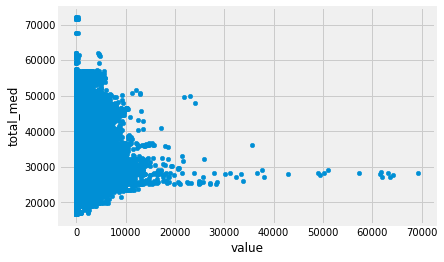

In [176]:
combined.plot.scatter(x="value", y = "total_med")

In [160]:
avg_val = []
avg_income = []
yr = []
for g in combined.groupby('year'):
    yr.append(g[0])
    avg_val.append(mean(g[1]["value"]))
    avg_income.append(mean(g[1]['total_med']))

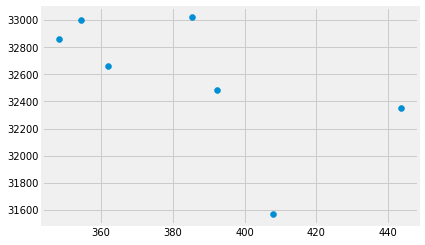

In [164]:
plt.scatter(avg_val, avg_income)

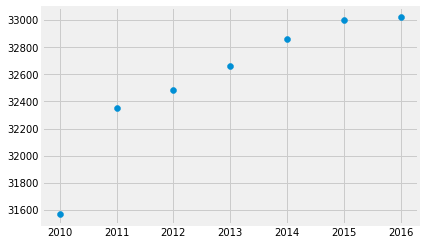

In [163]:
plt.scatter(yr, avg_income)

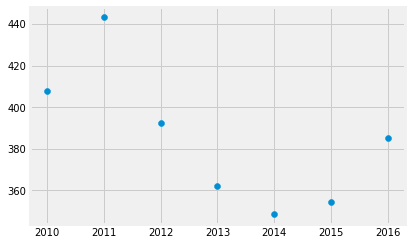

In [162]:
plt.scatter(yr, avg_val)

In [158]:
combined

,fips,year,contaminant_level,chemical_species,value,total_med,total_agri_fish_mine,manufacturing
0,6001,2010,1,Uranium,0.50,42407,25781,56407
1,6001,2010,1,Uranium,0.50,42407,25781,56407
2,6001,2010,1,Uranium,0.50,42407,25781,56407
3,6001,2010,1,Uranium,0.50,42407,25781,56407
4,6001,2010,1,Uranium,0.50,42407,25781,56407
5,6001,2010,1,Arsenic,1.00,42407,25781,56407
6,6001,2010,1,Arsenic,1.00,42407,25781,56407
7,6001,2010,1,Arsenic,1.00,42407,25781,56407
8,6001,2010,1,Arsenic,1.00,42407,25781,56407
9,6001,2010,1,Arsenic,1.00,42407,25781,56407


In [191]:
education_attainment.head()

,fips,year,pct_college_bachelors_or_higher,pct_less_than_hs
0,0,2000,24.4,19.6
1,1000,2000,19.0,24.7
2,1001,2000,18.0,21.3
3,1003,2000,23.1,18.0
4,1005,2000,10.9,35.3


In [193]:
ee = join_two_datasets(education_attainment, earnings, ["fips", "year"])

Text(0.5,1,'')

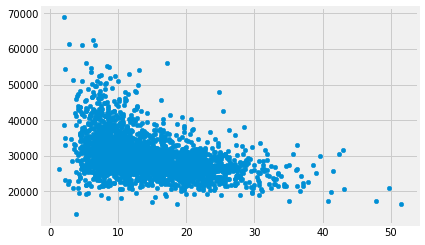

In [214]:
ee.plot.scatter(x="pct_less_than_hs", y="total_med")
plt.xlabel("")
plt.ylabel("")
plt.title("")

Text(0.5,1,'')

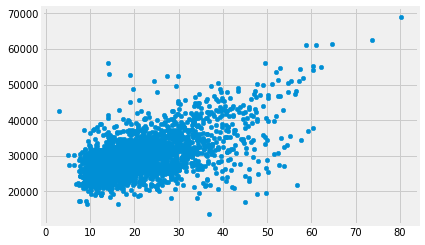

In [215]:
ee.plot.scatter(x="pct_college_bachelors_or_higher", y="total_med")
plt.xlabel("")
plt.ylabel("")
plt.title("")

# earnings

In [206]:
average_by_fips = earnings.groupby("year")
fips = []
yrs = []
avg_values = []
for g in average_by_fips:
    yrs.append(g[0])
    fip = g[1].groupby('fips')
    fips.append([y[0] for y in fip])
    a_v = []
    for y in fip:
        a_v.append(mean(y[1]["total_med"]))
    avg_values.append(a_v)
avg_per_year = [mean(x) for x in avg_values]  
    

Text(0.5,1,'Income over Time')

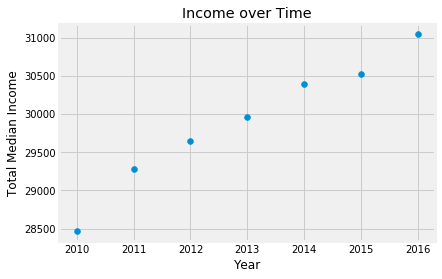

In [207]:
plt.scatter(yrs, avg_per_year)
plt.xlabel("Year")
plt.ylabel("Total Median Income")
plt.title("Income over Time")

# Average contamination across all counties is going down

In [208]:
average_by_fips = chemicals.groupby("year")
fips = []
yrs = []
avg_values = []
for g in average_by_fips:
    yrs.append(g[0])
    fip = g[1].groupby('fips')
    fips.append([y[0] for y in fip])
    a_v = []
    for y in fip:
        a_v.append(mean(y[1]["value"]))
    avg_values.append(a_v)
avg_per_year = [mean(x) for x in avg_values]  
    

Text(0.5,1,'Chemical Contamination Over Time')

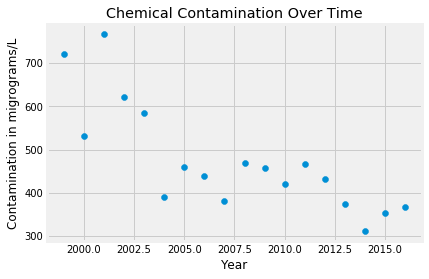

In [209]:
plt.scatter(yrs, avg_per_year)
plt.xlabel("Year")
plt.ylabel("Contamination in migrograms/L")
plt.title("Chemical Contamination Over Time")

In [145]:
avg_per_year

[721.7869037201644,
 530.4647357750606,
 767.5646191904723,
 621.7836729667683,
 585.1333458681248,
 390.88394955723464,
 460.524733928049,
 439.5854951857459,
 380.11560998773155,
 467.83504660647975,
 456.96137332828357,
 420.12719894983087,
 467.54462770762063,
 432.5463053629307,
 373.6769245532883,
 310.8142816435124,
 352.4795408380212,
 366.6066604622101]

# Average contamination per fips

In [180]:
average_by_year = chemicals.groupby("fips")
fips = []
yrs = []
avg_values = []
for g in average_by_year:
    fips.append(g[0])
    yr = g[1].groupby('year')
    yrs.append([y[0] for y in yr])
    a_v = []
    for y in yr:
        a_v.append(mean(y[1]["value"]))
    avg_values.append(a_v)
        
    

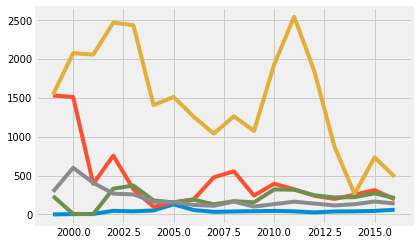

In [187]:
for i in range(100, 105):
    plt.plot(yrs[i], avg_values[i])

In [17]:
'''
@param df : pandas dataframe
@param other_df : another pandas dataframe
@reurn merge of two dataframes
'''
def join_two_datasets(df, other_df, fields):

    df['fips'] = df['fips'].astype(int)
    other_df['fips'] = other_df['fips'].astype(int)
    return pd.merge(df, other_df, on=fields, how="inner")

'''
@return dictionary mapping name to pandas data frame
'''
def generate_dfs():
    all_dfs = {}
    all_dfs['water_usage'] = preprocess_water_usage()
    all_dfs['industry_occupation'] = preprocess_industry_occupation()
    all_dfs['chemicals'] = preprocess_chemicals()
    all_dfs['droughts'] = preprocess_droughts()
    all_dfs['earnings'] = preprocess_earnings()
    all_dfs['education_attainment'] = preprocess_education_attainment()
    return all_dfs

# Contamination Value vs. Earnings

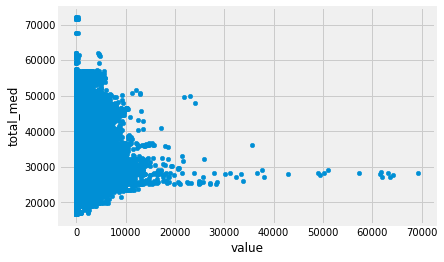

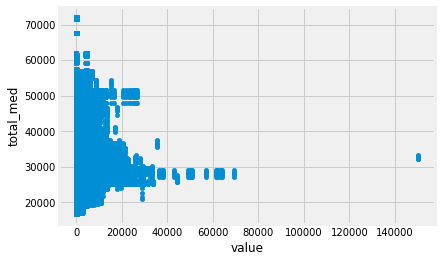

In [65]:
c_e_1 = join_two_datasets(chemicals, earnings, ['fips', 'year'])
c_e_1.plot.scatter(x='value', y='total_med')

# Contamination Value vs. Education Attainment

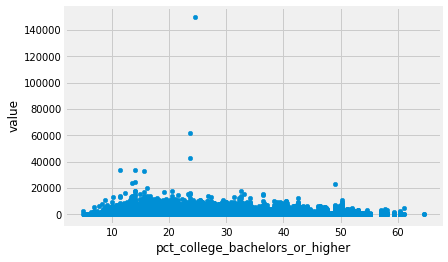

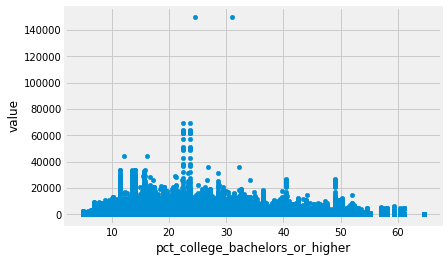

In [66]:
c_ed_1 =join_two_datasets(chemicals, education_attainment, ['fips', 'year'])
c_ed_1.plot.scatter(x='pct_college_bachelors_or_higher', y='value')
c_ed_2 =join_two_datasets(chemicals, education_attainment, ['fips'])
c_ed_2.plot.scatter(x='pct_college_bachelors_or_higher', y='value')

# Per Chemical analysis

## Contamination value v. Earnings

c:\users\jocel\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


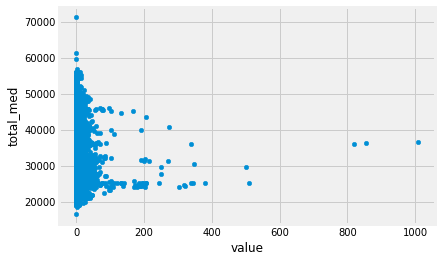

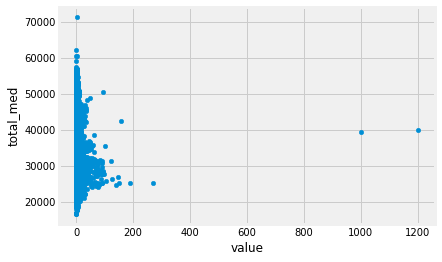

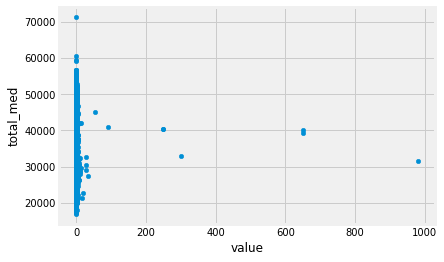

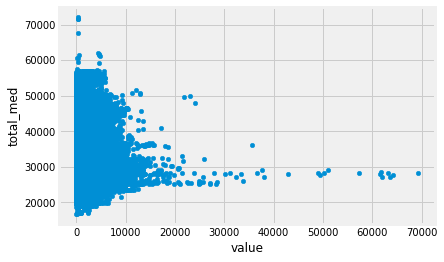

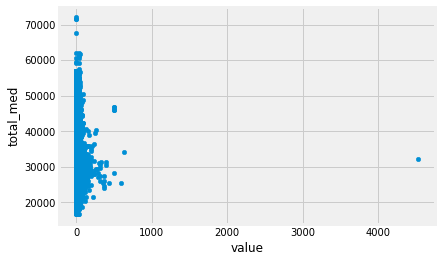

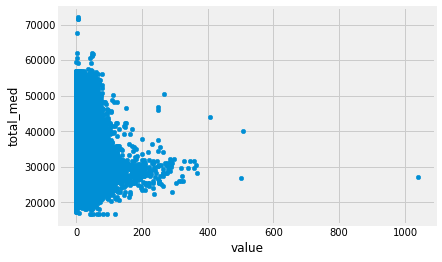

In [72]:
for chem in chemicals.chemical_species.unique():
    df_ = chemicals[chemicals.chemical_species==chem]
    join = join_two_datasets(df_, earnings, ['fips', 'year'])
    join.plot.scatter(x='value', y='total_med')

## Contamination Value v. Education

c:\users\jocel\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


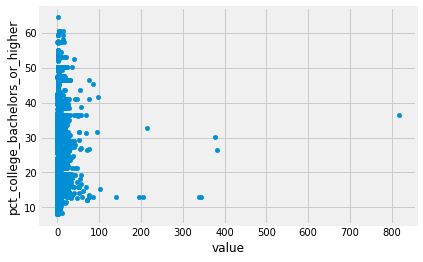

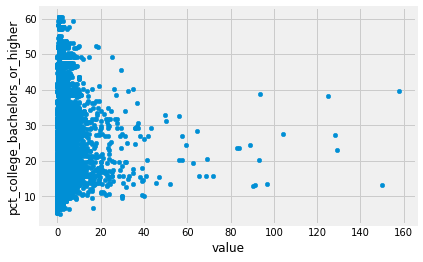

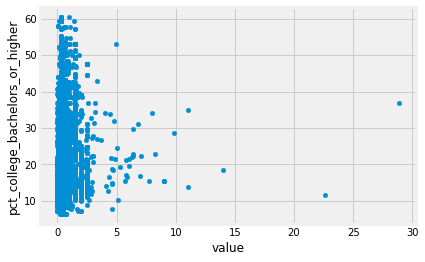

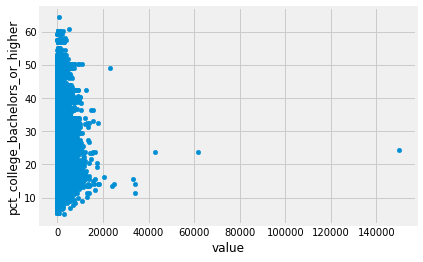

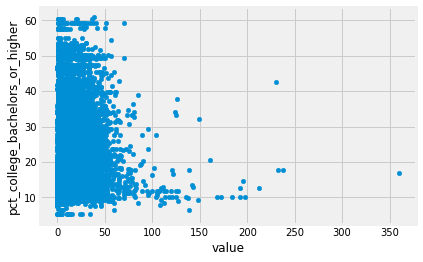

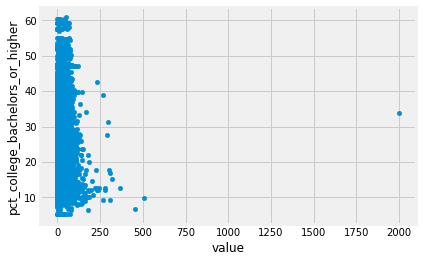

In [73]:
for chem in chemicals.chemical_species.unique():
    df_ = chemicals[chemicals.chemical_species==chem]
    join = join_two_datasets(df_, education_attainment, ['fips', 'year'])
    join.plot.scatter(x='value', y='pct_college_bachelors_or_higher')

In [3]:
def plot(x,y,x_label,y_label, name):
    figure = plt.figure(figsize = (20,15))
    ax = figure.add_subplot(1,1,1)
    ax.tick_params(axis = 'y', labelsize = 25)
    ax.tick_params(axis='x', labelsize=25)
    ax.scatter(x,y, color = 'b', s = 150)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept
    plt.plot(x,line, c = 'r')
    print(linregress(x,y))
    plt.xlabel(x_label, fontsize = '30')
    plt.ylabel(y_label, fontsize = '30')
    figure.suptitle(y_label+" in Relation to \n" + x_label, fontsize=50)
    figure.savefig(str(name + ".png"), dpi = 300)
    return slope, intercept, r_value, p_value, std_err

LinregressResult(slope=0.05288821875714914, intercept=32550.160727033555, rvalue=0.010023851747322541, pvalue=5.6337366459993543e-11, stderr=0.008070453308247835)


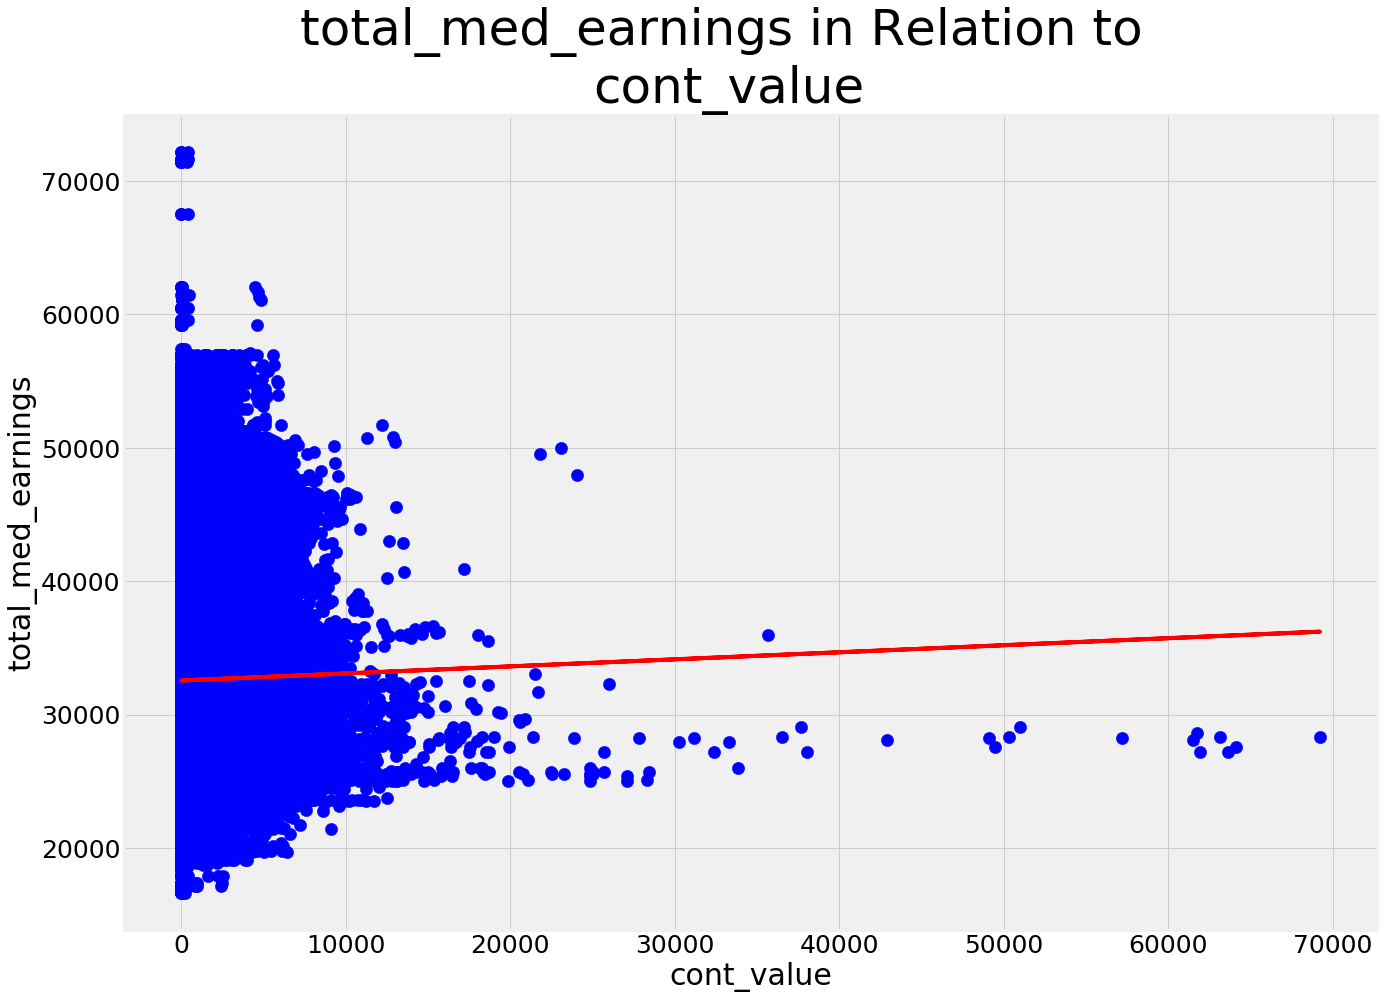

In [20]:
b, a, r, p, s = plot(c_e["value"][1:], c_e["total_med"][1:], "cont_value", "total_med_earnings", "plot1")

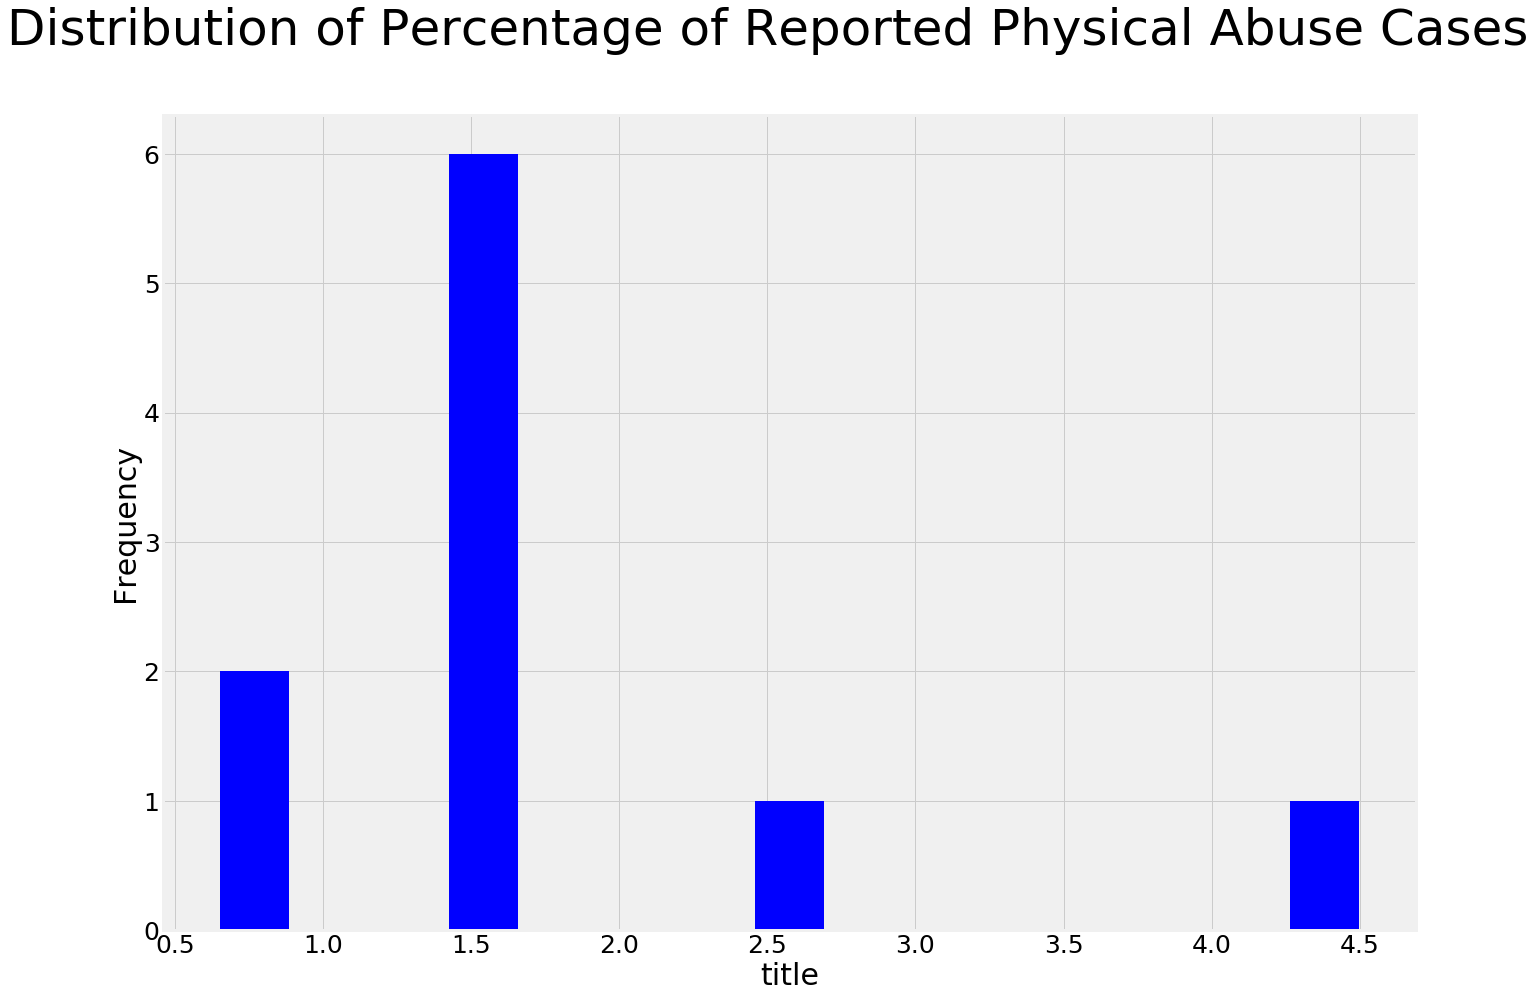

In [7]:
figure = plt.figure(figsize = (20,15))
x_label = "title"
y_label = "Frequency"
plt.hist(chemicals["value"], bins = 15, rwidth = .9, color = 'blue')
plt.xlabel(x_label, fontsize = '30')
plt.ylabel(y_label, fontsize = '30')
plt.tick_params(axis = 'y', labelsize = 25)
plt.tick_params(axis='x', labelsize=25)
figure.suptitle("Distribution of Percentage of Reported Physical Abuse Cases", fontsize=50)
figure.savefig(str("Hist_x1.png"), dpi = 300)

c:\users\jocel\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


[863.789592760181, 152.5974025974026, 501.91358024691357, 572.5631067961165, 214.81203007518798, 1087.7941176470588, 2613.053435114504, 620.0626959247649, 532.8612716763006, 1390.7668711656443, 2110.2448979591836, 504.0057636887608, 1098.8950276243095, 205.16949152542372, 1034.9802371541502, 916.6760762173607, 1263.5758835758836, 2499.9239864864867, 65.48780487804878, 517.0, 495.76576576576576, 1370.233918128655, 1637.2248803827752, 595.6506849315068, 1931.725888324873, 1694.6320346320347, 2444.008908685969, 898.9490445859873, 25.766871165644172, 944.7244094488188, 1218.5642317380352, 624.375, 729.8601398601398, 877.1428571428571, 3281.875, 198.955223880597, 638.7608069164265, 360.17334777898157, 799.1666666666666, 40.80357142857143, 1164.9418604651162, 535.3571428571429, 492.4755700325733, 154.52153110047846, 136.28389154704945, 3441.9883040935674, 2043.0585516178737, 2741.72, 336.6491458607096, 105.42372881355932, 183.30739299610894, 2400.4065040650407, 1848.7551867219918, 622.262156

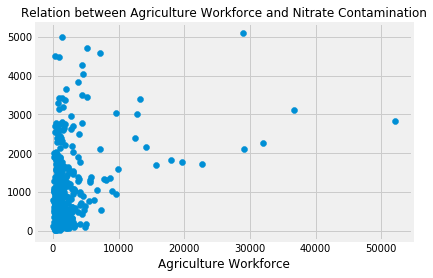

In [212]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
def read_csv(df_name):
    return pd.read_csv(df_name + '_processed.csv')
df_industry = read_csv('industry_occupation')
fips_to_agro = {}
df_industry = df_industry.dropna(subset=['agriculture'])
fips_names = list(df_industry.fips)
agro_names = list(df_industry.agriculture)
for f, a in zip(fips_names, agro_names):
    fips_to_agro[f] = a
df_chemicals = read_csv('chemicals')
df_chemicals = df_chemicals[df_chemicals['chemical_species'] == 'Nitrates']
df_chemicals.dropna()
average_by_fips = df_chemicals.groupby("fips")
fips_to_contam = {}
for g in average_by_fips:
    fips_to_contam[g[0]] = np.mean(g[1]["value"])
contam = []
agro = []
for fip in fips_to_contam:
    if fip in fips_to_agro:
        contam.append(fips_to_contam[fip])
        agro.append(fips_to_agro[fip])
print(contam)
print(agro)
stats.pearsonr(contam, agro)
plt.title('Relation between Agriculture Workforce and Nitrate Contamination', fontdict={"fontsize":12})
plt.scatter(agro, contam)
plt.xlabel('Agriculture Workforce')
plt.savefig('chemicals_workforce.png')



In [8]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)
category = chemicals["value"]
score = earnings["total_med"]
scores_treatment = []
scores_control = []
for i in range(0, len(category.values)):
    if category[i] == 1:
        scores_treatment.append(score[i])
    if category[i] == 2:
        scores_control.append(score[i])
print(len(scores_treatment))
print(len(scores_control))
print(mean(scores_treatment))
print(mean(scores_control))
print(np.std(scores_treatment))
print(np.std(scores_control))

0
0
0.0
0.0
nan
nan


c:\users\jocel\appdata\local\programs\python\python35\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\jocel\appdata\local\programs\python\python35\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\jocel\appdata\local\programs\python\python35\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
